In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n### 학습 데이터 정보 ### \n')
print(titanic_df.info())


### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세크 Null 값 개수 ',titanic_df.isnull().sum().sum())

데이터 세크 Null 값 개수  0


In [4]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n',titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
E68              1
C50              1
C49              1
C101             1
T                1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


In [6]:
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [7]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

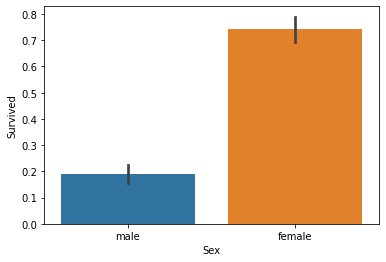

In [8]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

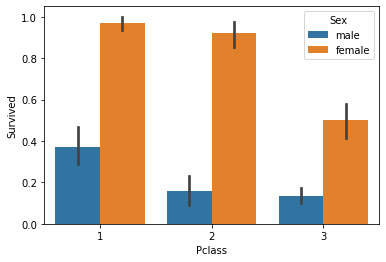

In [9]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

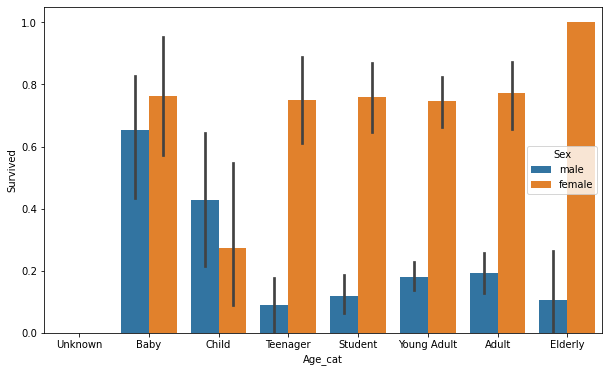

In [10]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
    
    return cat


# 막대그래프이 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived', hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [11]:
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF


titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


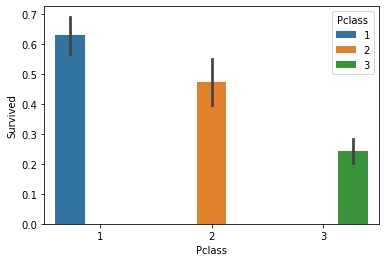

In [15]:
sns.barplot(x='Pclass',y='Survived',hue='Pclass',data=titanic_df)

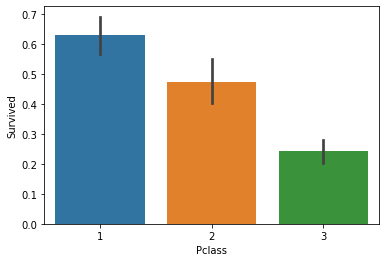

In [17]:
sns.barplot(x='Pclass', y='Survived',data=titanic_df)

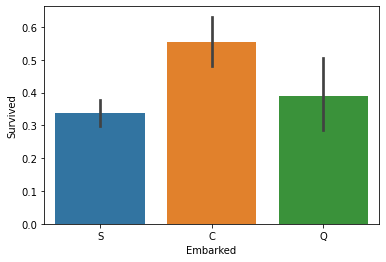

In [18]:
sns.barplot(x='Embarked',y='Survived',data=titanic_df)

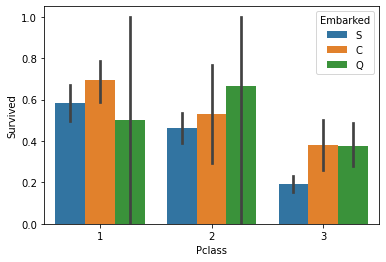

In [19]:
sns.barplot(x='Pclass',y='Survived',hue='Embarked',data=titanic_df)

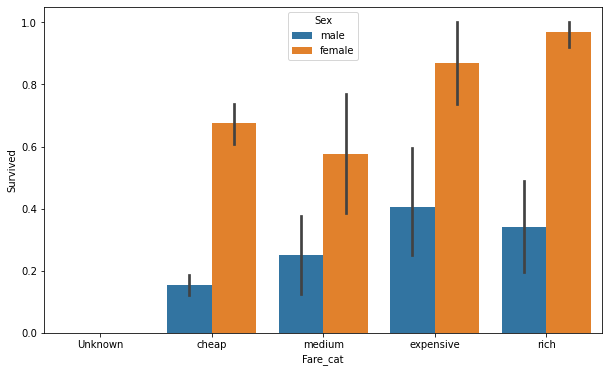

In [23]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(fare):
    cat = ''
    if fare <= -1: cat = 'Unknown'
    elif fare <= 30: cat = 'cheap'
    elif fare <= 50: cat = 'medium'
    elif fare <= 70: cat = 'expensive'
    else : cat = 'rich'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'cheap', 'medium', 'expensive', 'rich']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Fare_cat'] = titanic_df['Fare'].apply(lambda x : get_category(x))
sns.barplot(x='Fare_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Fare_cat', axis=1, inplace=True)